<a href="https://colab.research.google.com/github/shaheerahmad04/Deep-Learning-Project-using-Neural-Network/blob/main/DL_Project_2_MNIST_Digit_Classification_using_Deep_Learning(Neural_Network).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST Data from Keras.datasets

In [4]:
# Loading the MNIST data from keras.datasets
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
# Checking the type of the training data
type(X_train)

numpy.ndarray

In [7]:
#shape of the numpy array
print(X_train.shape, Y_train.shape,X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 images

Test data = 10,000 images

Image Dimension = 28 x 28

GrayScale = 1 Channel

In [8]:
# Printing the 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [9]:
print(X_train[10].shape)

(28, 28)


2


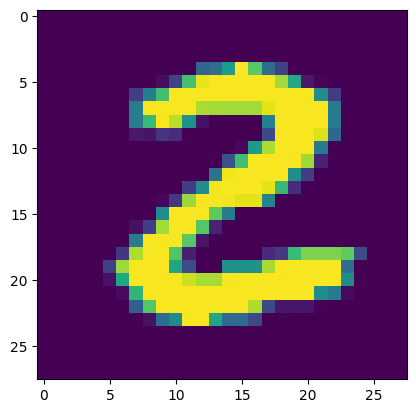

In [15]:
#Displaying the image
plt.imshow(X_train[25])
plt.show

#Printing the corresponding label
print(Y_train[25])

Image Labels

In [16]:
print(Y_train.shape,Y_test.shape)

(60000,) (10000,)


In [17]:
#Unique Values in Y_train
print(np.unique(Y_train))

#Unique Values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We Can use this labels as such or we can also apply One Hot Encoding

All the images has the same dimension in this dataset if not we have to resize this all the images in the common dimension

In [18]:
#Scaling the images

X_train = X_train/255
X_test = X_test/255

In [20]:
#Printing the 10th image
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [24]:
#Setting up the layers for the Neural Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense( 50, activation='relu'),
                          keras.layers.Dense( 50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
#Compiling the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
#training the neural network
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8514 - loss: 0.5075
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9564 - loss: 0.1484
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9681 - loss: 0.1055
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9752 - loss: 0.0819
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9802 - loss: 0.0667
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9834 - loss: 0.0551
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9866 - loss: 0.0463
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9885 - loss: 0.0395
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9887 - loss: 0.0370
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9892 - loss: 0.0320


Training data accuracy = 98.9%

**Accuracy on Test Data:**

In [27]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9647 - loss: 0.1472
0.9686999917030334


Test data accuracy = 96.4%

In [28]:
print(X_test.shape)

(10000, 28, 28)


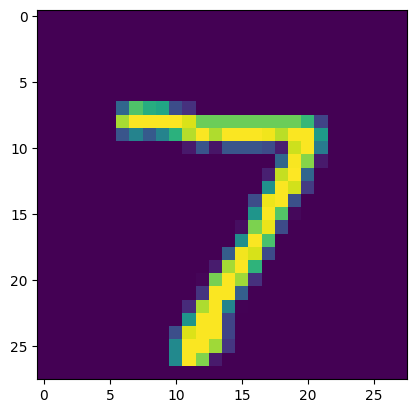

In [29]:
#first datapoint in the test data
plt.imshow(X_test[0])
plt.show()

In [30]:
print(Y_test[0])

7


In [31]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [32]:
print(Y_pred.shape)

(10000, 10)


In [33]:
print(Y_pred[0])

[1.69511177e-02 3.62674557e-02 9.64846238e-02 9.94452000e-01
 2.82414646e-07 1.07377246e-01 1.89579841e-09 9.99999642e-01
 3.54503125e-01 9.88264263e-01]


model.predict() gives the prediction probability of each class for that datapoint

In [34]:
#converting the prediction probablities to class labels

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [35]:
# converting the prediction probability to class labels for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(3), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(2), np.int64(5), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

In [36]:
print(Y_pred)

[[1.6951118e-02 3.6267456e-02 9.6484624e-02 ... 9.9999964e-01
  3.5450312e-01 9.8826426e-01]
 [1.8113272e-02 9.8317844e-01 1.0000000e+00 ... 1.5878206e-07
  3.1396854e-01 1.0483329e-11]
 [1.6440428e-04 9.9957353e-01 5.0084036e-02 ... 9.0865844e-01
  3.9800685e-02 7.4507683e-05]
 ...
 [9.8103961e-09 8.3885889e-06 4.0347453e-07 ... 9.3564862e-01
  1.5974764e-02 5.4856926e-01]
 [2.0418758e-05 6.1772671e-04 9.5382029e-06 ... 8.2398832e-02
  6.9529969e-01 3.4618996e-08]
 [1.6966902e-05 1.6488659e-07 1.4026028e-07 ... 1.1352030e-06
  3.1188855e-04 1.1907610e-08]]


Y_test --> True Labels

Y_Pred_Labels --> Predicted Labels

Confusion Matrix

In [37]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 941    0    0    3    0    6    8    6    4   12]
 [   0 1109    4    3    0    0    3    8    8    0]
 [   0    2  999    7    2    0    4   11    7    0]
 [   0    0    1  987    0    4    0   10    5    3]
 [   0    0   10    0  954    1    4    4    3    6]
 [   1    0    0   30    0  851    3    2    4    1]
 [   0    2    0    1    4   10  935    2    4    0]
 [   0    0    6    3    0    0    0 1009    2    8]
 [   2    0    3   12    2    5    2    5  943    0]
 [   1    2    0    6   10    7    2   12   10  959]], shape=(10, 10), dtype=int32)


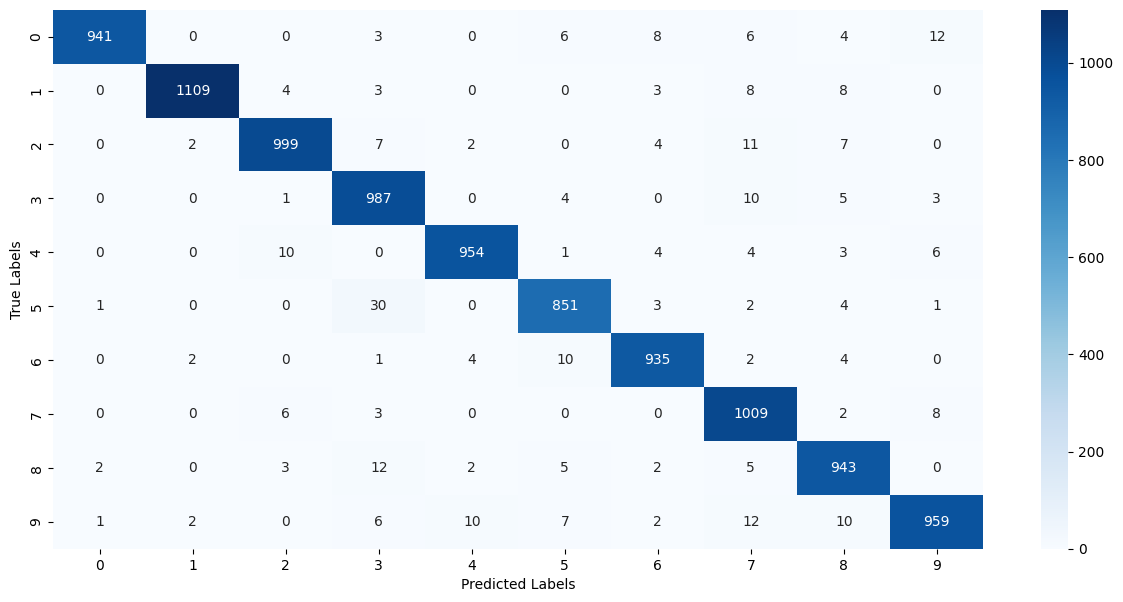

In [38]:
plt.figure(figsize=(15, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [74]:
# 31: Load the image
input_image_path = '/content/MNIST_digit.png'
input_image = cv2.imread(input_image_path)

In [75]:
type(input_image)

numpy.ndarray

In [76]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


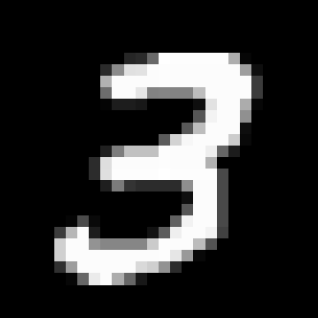

In [77]:
cv2_imshow(input_image)

In [78]:
# Check the shape of the original image (Height, Width, Channels)
input_image.shape

(318, 318, 3)

In [79]:
# Convert the image from RGB to Grayscale
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)


In [80]:
# Check the shape of the grayscale image (Height, Width)
grayscale.shape

(318, 318)

In [81]:
# Resize the image to 28x28 pixels
input_image_resize = cv2.resize(grayscale, (28, 28))

In [82]:
# Check the shape after resizing
input_image_resize.shape

(28, 28)

In [83]:
# Display the resized image
cv2_imshow(input_image_resize)

In [84]:
# Normalize the image (scale pixel values to 0-1)
input_image_resize = input_image_resize / 255

In [85]:
# Reshape for the model (Batch size of 1)
image_reshaped = np.reshape(input_image_resize, [1, 28, 28])

In [86]:
# Perform prediction
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
[[6.6894339e-09 4.3349561e-01 9.9541664e-01 1.0000000e+00 1.9553825e-15
  1.4445088e-03 2.9637897e-13 2.4301952e-02 9.8088306e-01 2.4879837e-02]]


In [87]:
# Get the label with the highest probability
input_pred_label = np.argmax(input_prediction)

In [88]:
# Print the final result
print(input_pred_label)

3


Path of the image to be predicted: /content/31909713-d9046856-b7ef-11e7-98fe-8a1e133c0010.png


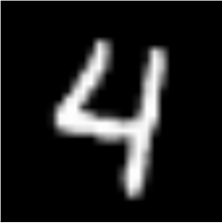

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
The Handwritten Digit is recognised as  4


In [91]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)